In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

In [202]:
df_red=pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=";")
df_white=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=";")
display(df_red)
display(df_white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [203]:
# dropping duplicates
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

In [204]:
#Checking variable inforamtion 
display(df_red.info())
display(df_white.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


None

In [205]:
# For red wine calculating unique and null values
for col in df_red.columns.values:
  list_vals = pd.unique(df_red[col]) #list of unique values
  print(col + ' has ' + str(len(list_vals))  +' unique values, and ' + str(df_red[col].isna().sum())+' null entries')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print(' These are: '+list_str[0:len(list_str) - 2])

# For white wine calculating unique and null values
for col in df_white.columns.values:
  list_vals = pd.unique(df_white[col]) #list of unique values
  print(col + ' has ' + str(len(list_vals))  +' unique values, and ' + str(df_white[col].isna().sum())+' null entries')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print(' These are: '+list_str[0:len(list_str) - 2])

fixed acidity has 96 unique values, and 0 null entries
volatile acidity has 143 unique values, and 0 null entries
citric acid has 80 unique values, and 0 null entries
residual sugar has 91 unique values, and 0 null entries
chlorides has 153 unique values, and 0 null entries
free sulfur dioxide has 60 unique values, and 0 null entries
total sulfur dioxide has 144 unique values, and 0 null entries
density has 436 unique values, and 0 null entries
pH has 89 unique values, and 0 null entries
sulphates has 96 unique values, and 0 null entries
alcohol has 65 unique values, and 0 null entries
quality has 6 unique values, and 0 null entries
 These are: 5, 6, 7, 4, 8, 3
fixed acidity has 68 unique values, and 0 null entries
volatile acidity has 125 unique values, and 0 null entries
citric acid has 87 unique values, and 0 null entries
residual sugar has 310 unique values, and 0 null entries
chlorides has 160 unique values, and 0 null entries
free sulfur dioxide has 132 unique values, and 0 null 

#Observations:
1: No column has null entry.

In [206]:
#Visualisation of similarity between two variable in wine data by checking correlation between variabes
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


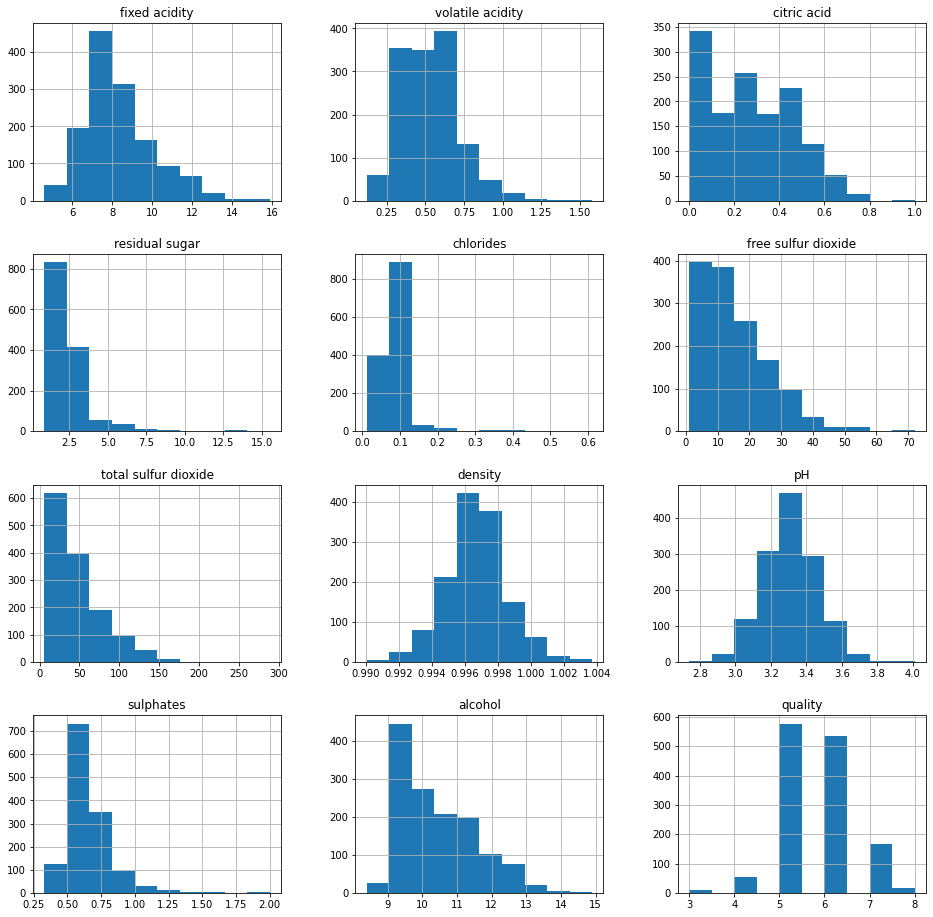

In [207]:
#Visualisation of data through histogams
#Checking if the data is skewed 
df_red.hist(bins=10, figsize=(16,16))
plt.figure(1)
plt.show()


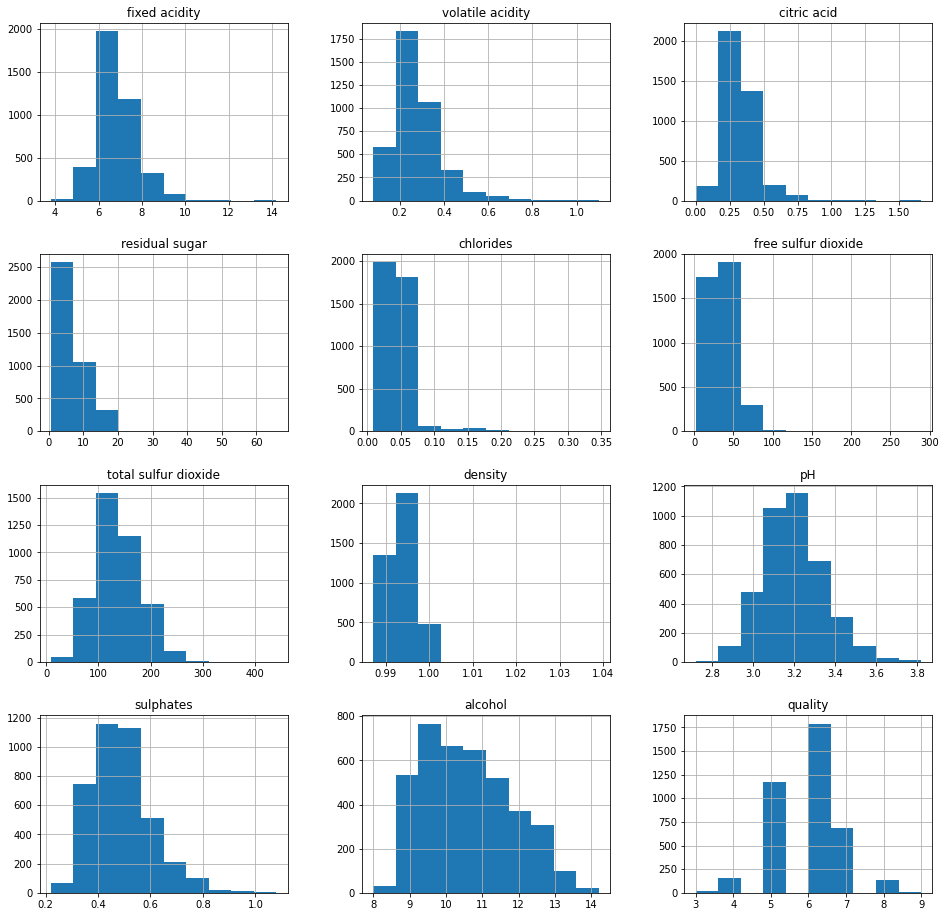

In [208]:
#Visualisation of white wine data through histogams
#Checking if the data is skewed 
df_white.hist(bins=10, figsize=(16,16))
plt.figure(1)
plt.show()

#Obs:
'acohol', 'sulphates','residual sugar','chlorides', 'free sulphur dioxide', 'total sulphur dioxide' hist seems to be positively skewed.

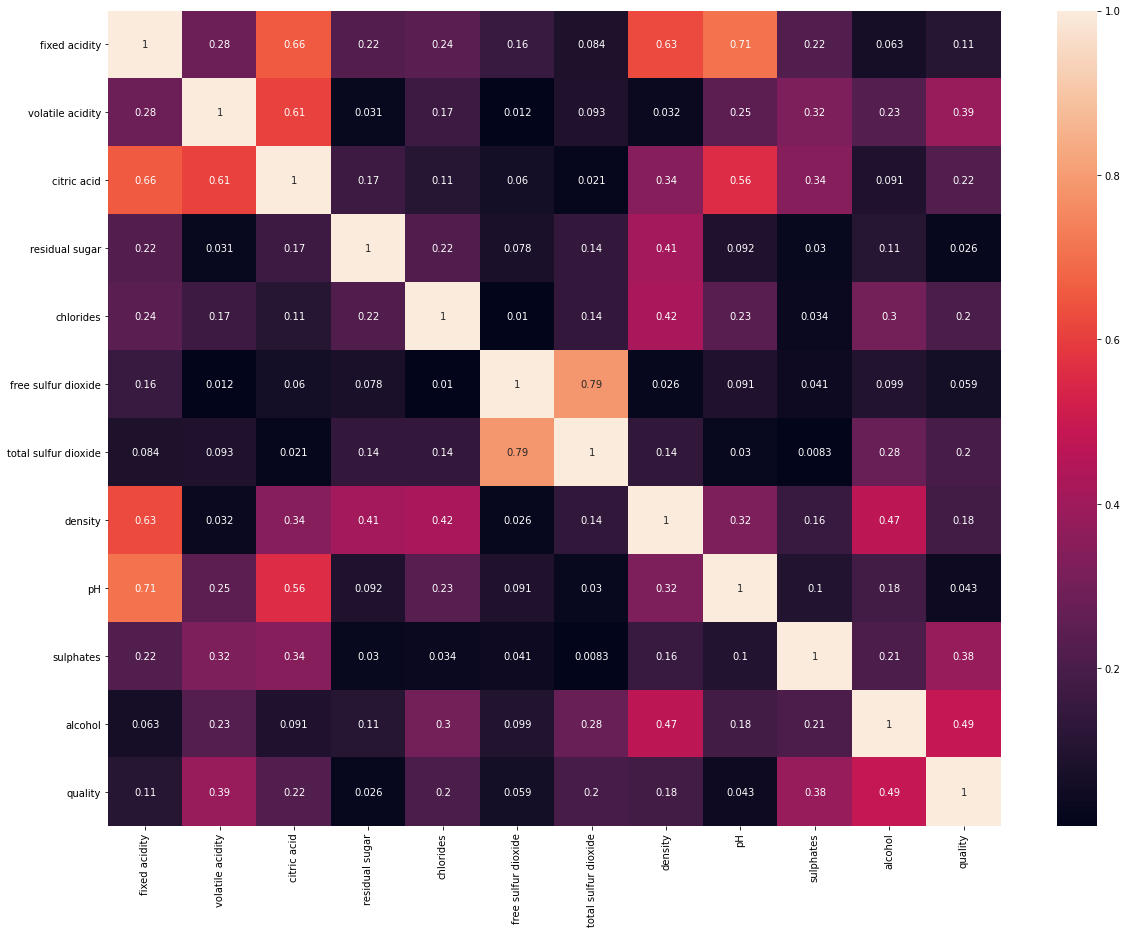

In [209]:
# visualization of correlation by heatmap for red wine

corr = df_red.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(abs(corr), annot = True)
plt.show()

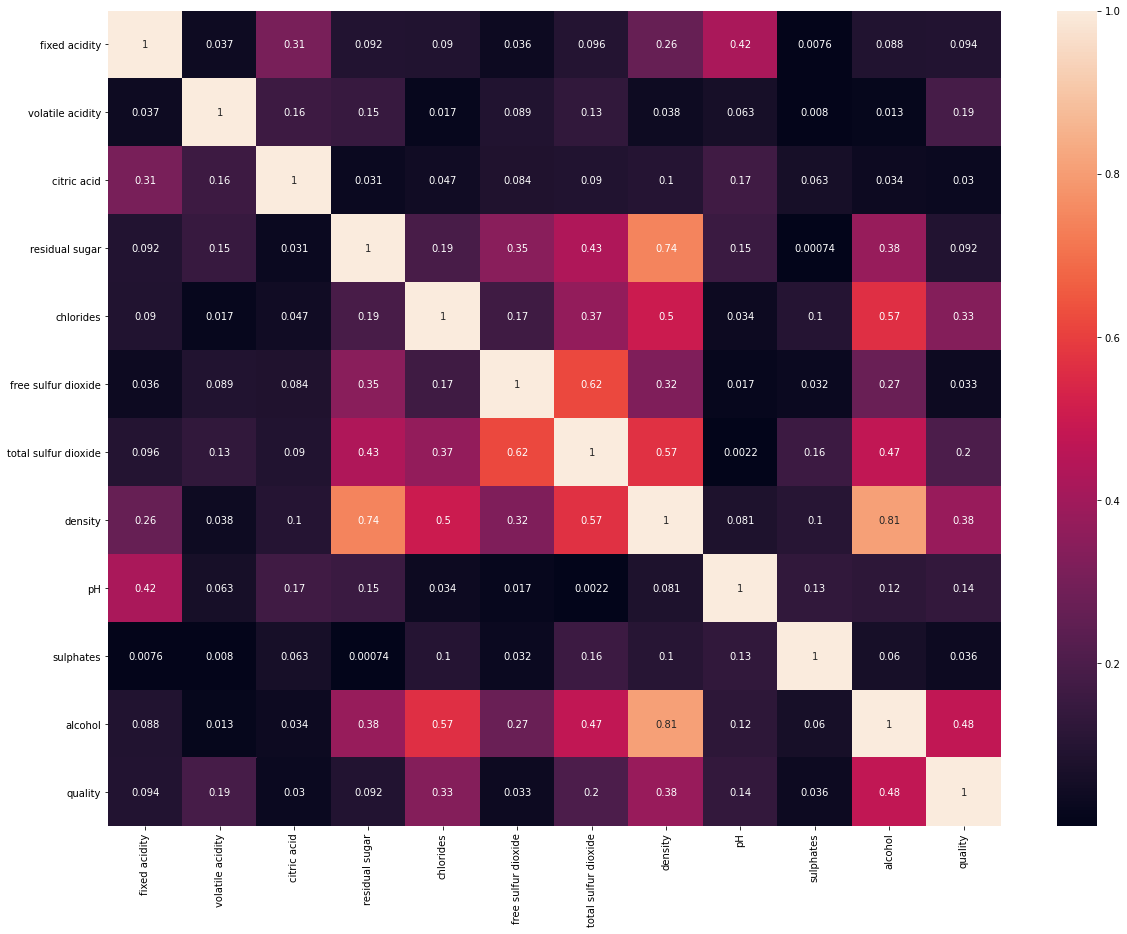

In [210]:
# visualization of correlation by heatmap for White wine

corr = df_white.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(abs(corr), annot = True)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

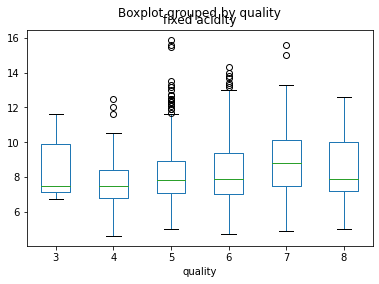

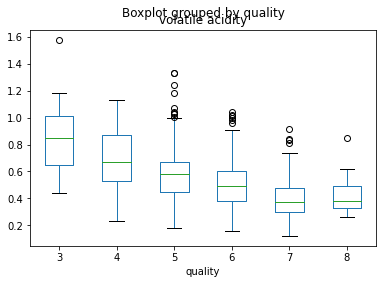

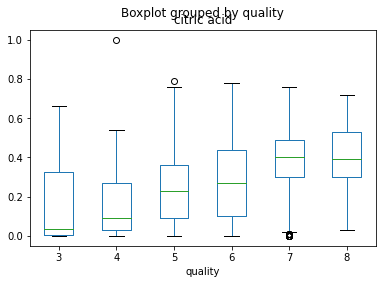

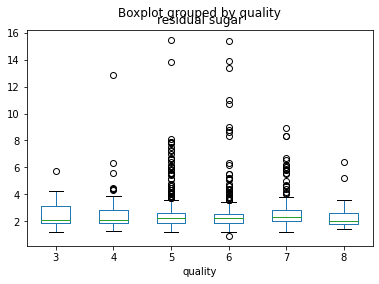

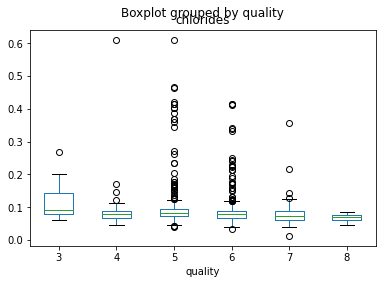

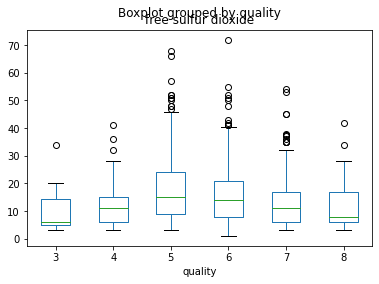

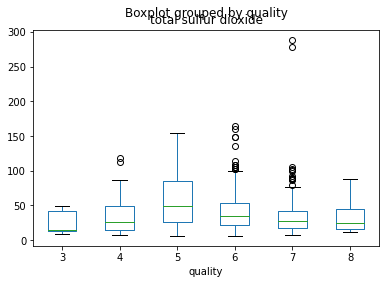

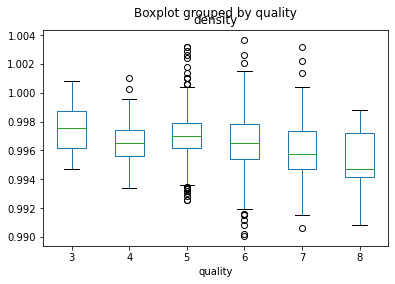

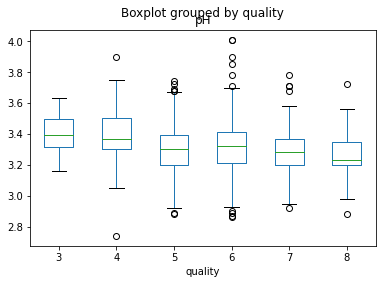

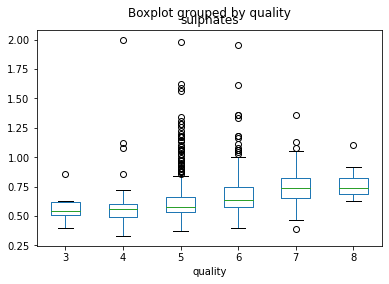

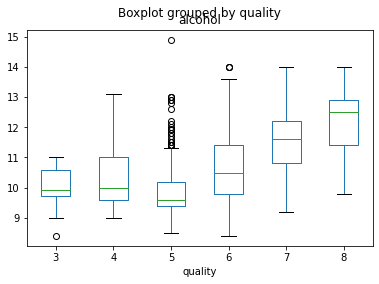

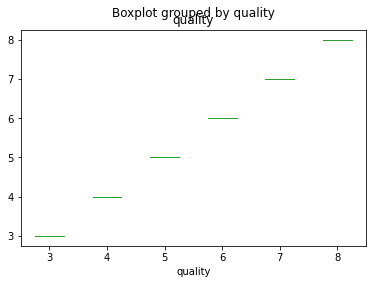

In [211]:
# boxplot for red wine
for col in df_red.columns.values:
  df_red.boxplot(by = 'quality', column = col, grid = False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

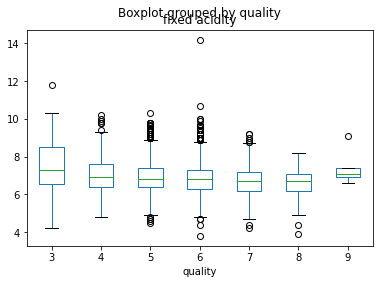

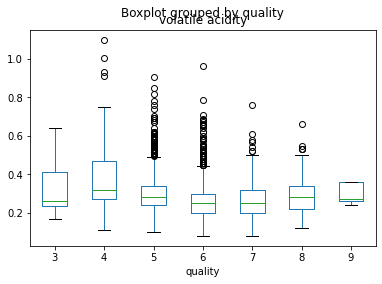

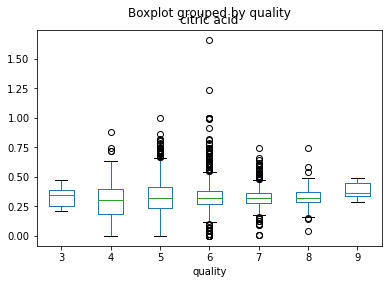

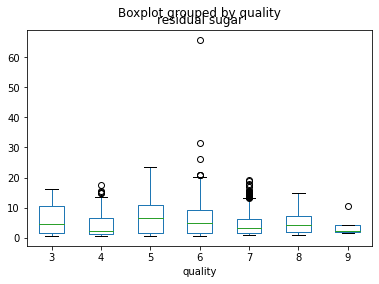

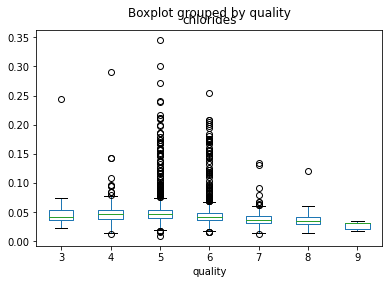

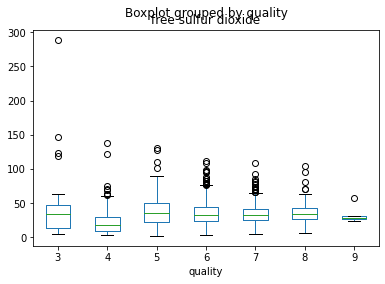

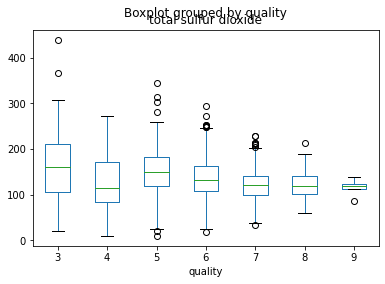

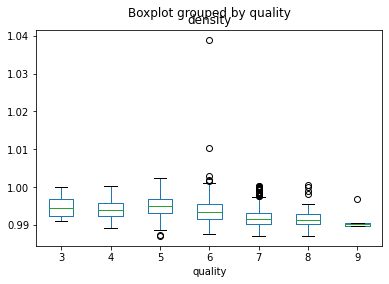

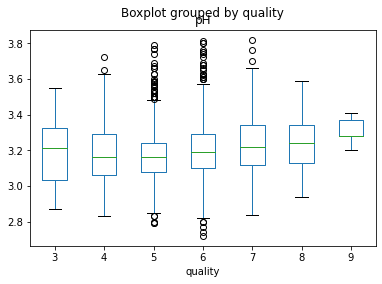

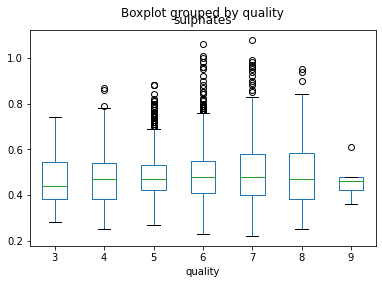

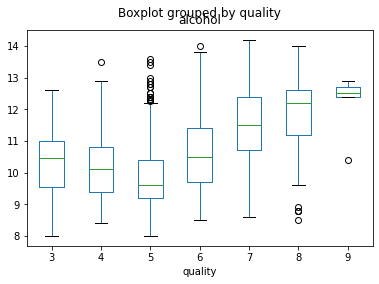

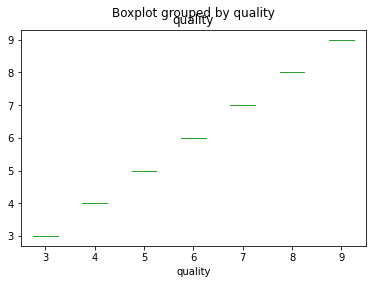

In [212]:
# boxplot for white wine
for col in df_white.columns.values:
  df_white.boxplot(by = 'quality', column = col, grid = False)

#Preparation of data

In [213]:
#x = df_red.drop('free sulfur dioxide',axis=1)

In [214]:
#forred wine data and label
x = df_red.drop('quality',axis=1) # keeping all the coumns except quality, input x
y = df_red['quality']  #'quality' as target var

In [215]:
a = df_white.drop('quality',axis=1) # keeping all the coumns except quality, input x
b = df_white['quality']  #'quality' as Label

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
#dividing the data into two parts train and test data (x,y)for red wine, (a,b)for white wine
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=101)

In [218]:
#scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#for white wine
a_train = sc.fit_transform(a_train)
a_test = sc.fit_transform(a_test)

#LASSO L1  Regression

In [219]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
lasso_reg=Lasso()

#hyperparameter tuning and cross validation using grid

parameter_grid_lasso=({'alpha':[0.001,0.01,0.1,1,10,100,1000]}) #setting dictionary for parameter values

grid_search = GridSearchCV(lasso_reg, parameter_grid_lasso, cv=5,scoring='neg_mean_squared_error',return_train_score=True) #grid search for red
white_grid_search = GridSearchCV(lasso_reg, parameter_grid_lasso, cv=5,scoring='neg_mean_squared_error',return_train_score=True) #for whitw winw

grid_search.fit(x_train,y_train) #training and fitting data for red wine

white_grid_search.fit(a_train,b_train)   #training and fitting data for white wine

print('')
print('Best parameter for red wine is',grid_search.best_params_) #for red wine
print('')
print('')
print('Best parameter for white wine is',white_grid_search.best_params_) #for white wine
print('')




Best parameter for red wine is {'alpha': 0.01}


Best parameter for white wine is {'alpha': 0.01}



#Testing the model

In [220]:
#for red wine testing
#Lasso best model metrics
lasso_final_model=grid_search.best_estimator_
lasso_final_prediction=lasso_final_model.predict(x_test)

mse_lasso = mean_squared_error(y_test,lasso_final_prediction)
rmse = np.sqrt(mse_lasso)
print('Tesying parameters for Red wine are')
print("\nLasso Regression RMSE:",rmse)
MAE=mean_absolute_error(y_test, lasso_final_prediction)
print("\nLasso Regression MAE:",MAE)
print("\nLasso Regression MSE:",mse_lasso)

lasso_scores = cross_val_score(lasso_reg, x_train, y_train,scoring="neg_mean_squared_error", cv = 10)
print('\nLasso CV score is ',lasso_scores.mean())

print('\ncoefficients of bestestimator are ',lasso_final_model.coef_)

Tesying parameters for Red wine are

Lasso Regression RMSE: 0.669583214580127

Lasso Regression MAE: 0.5225142886509236

Lasso Regression MSE: 0.44834168124745644

Lasso CV score is  -0.6738527102028826

coefficients of bestestimator are  [-0.         -0.18822622 -0.00573779  0.00942742 -0.10365696  0.
 -0.04315893 -0.01305741 -0.0597066   0.15821998  0.30976761]


In [221]:
#Testing the model for white wine
lasso_final_model=white_grid_search.best_estimator_
lasso_final_prediction=lasso_final_model.predict(a_test)

mse_lasso = mean_squared_error(b_test,lasso_final_prediction)
rmse = np.sqrt(mse_lasso)

print('Tesying parameters for white wine are')
print("\nLasso Regression RMSE:",rmse)
MAE=mean_absolute_error(b_test, lasso_final_prediction)
print("\nLasso Regression MAE:",MAE)
print("\nLasso Regression MSE:",mse_lasso)

lasso_scores = cross_val_score(lasso_reg, a_train, b_train,scoring="neg_mean_squared_error", cv = 10)
print('\nLasso CV score is ',lasso_scores.mean())

print('\ncoefficients of bestestimator are ',lasso_final_model.coef_)

Tesying parameters for white wine are

Lasso Regression RMSE: 0.7399127620760989

Lasso Regression MAE: 0.5718953963489289

Lasso Regression MSE: 0.5474708954830817

Lasso CV score is  -0.8054583580436189

coefficients of bestestimator are  [-0.01099256 -0.16203032  0.01450484  0.14749193 -0.01572721  0.09046415
 -0.01935909 -0.13611277  0.04855118  0.05223789  0.38198165]


Reducing the value of alpha reduces the error of the model.
The parameter α is used for feature reduction, estimating the sparse coefficients. α = 0 is similar to linear regression Calculate errors

Testing the red dataset with white model or vice versa:
Not able to get the result as both are having different dimensions.

#L1 L2 ElasticNet

#training and testing for Red wine of L1L2 Enet

In [222]:
#rigorous training and testing for red wine
from sklearn.linear_model import ElasticNet
Enet=ElasticNet()
enet_param_grid = [{'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]
En_param_grid_search = GridSearchCV(Enet, enet_param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=False)
En_param_grid_search.fit(x_train,y_train)
print('')
print('Best parameter is',En_param_grid_search.best_params_)
print('')

#ENET best model metrics
Enet_final_model=En_param_grid_search.best_estimator_
Enet_final_prediction=Enet_final_model.predict(x_test)

mse_Enet = mean_squared_error(y_test,Enet_final_prediction)
rmse = np.sqrt(mse_Enet)
print('Tesying parameters for RED wine are')
print("\nENET Regression RMSE:",rmse)
MAE=mean_absolute_error(y_test, Enet_final_prediction)
print("\nENET Regression MAE:",MAE)
print("\nENET Regression MSE:",mse_Enet)

Enet_scores = cross_val_score(Enet, x_train, y_train,scoring="neg_mean_squared_error", cv = 5)
print('\nENET  coefficients of bestestimator are ',Enet_final_model.coef_)


Best parameter is {'alpha': 0.01, 'l1_ratio': 0.7}

Tesying parameters for RED wine are

ENET Regression RMSE: 0.6701157828877404

ENET Regression MAE: 0.5226655358624054

ENET Regression MSE: 0.4490551624752493

ENET  coefficients of bestestimator are  [-0.         -0.19081555 -0.01430124  0.01514284 -0.10882849  0.00678701
 -0.05173179 -0.01772548 -0.06902841  0.16419338  0.30841417]


#training and testing for **White** wine of L1L2 Enet

In [223]:
#training and testing of model for white wine
enet_param_grid = [{'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]
white_En_param_grid_search = GridSearchCV(Enet, enet_param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=False)
white_En_param_grid_search.fit(a_train,b_train)

print('Tesying parameters for white wine are')
print('')
print('Best parameter for white wine data is',white_En_param_grid_search.best_params_)
print('')

#ENET best model metrics
Enet_final_model=white_En_param_grid_search.best_estimator_
Enet_final_prediction=Enet_final_model.predict(a_test)

mse_Enet = mean_squared_error(b_test,Enet_final_prediction)
rmse = np.sqrt(mse_Enet)

print("\nENET Regression RMSE:",rmse)
MAE=mean_absolute_error(b_test, Enet_final_prediction)
print("\nENET Regression MAE:",MAE)
print("\nENET Regression MSE:",mse_Enet)

Enet_scores = cross_val_score(Enet, a_train, b_train,scoring="neg_mean_squared_error", cv = 5)
print('\nENET  coefficients of bestestimator are ',Enet_final_model.coef_)

Tesying parameters for white wine are

Best parameter for white wine data is {'alpha': 0.01, 'l1_ratio': 0.1}


ENET Regression RMSE: 0.7377310817794659

ENET Regression MAE: 0.5697110989166195

ENET Regression MSE: 0.544247149023501

ENET  coefficients of bestestimator are  [ 0.01087688 -0.16024106  0.03022681  0.24920698 -0.01806774  0.10343214
 -0.03806477 -0.27439823  0.08116125  0.06891974  0.31931421]


#**Random Forest**

#Training and Testing of RED Wine DATA

In [224]:
#training and testing of model for RED wine
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
forest_reg = RandomForestRegressor()

#parameter grid
forest_param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [True,False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

grid_search = GridSearchCV(forest_reg, forest_param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(x_train,y_train)
grid_search.best_params_
print('The parameters for fitting and testing of RED wine are')
print('Best parameter is',grid_search.best_params_)
print('')

#ENET best model metrics
forest_final_model=grid_search.best_estimator_
forest_final_prediction=forest_final_model.predict(x_test)

mse_forest = mean_squared_error(y_test,forest_final_prediction)
rmse = np.sqrt(mse_forest)

print("\nRandomForest Regression RMSE:",rmse)
MAE=mean_absolute_error(y_test, forest_final_prediction)
print("\nRandomForest Regression MAE:",MAE)
print("\nRandomForest Regression MSE:",mse_forest)

forest_scores = cross_val_score(forest_reg, x_train, y_train,scoring="neg_mean_squared_error", cv = 10)
print('\nRF cross validation score is',forest_scores.mean())

The parameters for fitting and testing of RED wine are
Best parameter is {'max_features': 4, 'n_estimators': 30}


RandomForest Regression RMSE: 0.6583653917899648

RandomForest Regression MAE: 0.5110294117647058

RandomForest Regression MSE: 0.4334449891067538

RF cross validation score is -0.4240906907894736


#Training and TESTING for WHITE wine for RANDOM Forest model

In [225]:
#training and testing of model for White wine

white_grid_search = GridSearchCV(forest_reg, forest_param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

white_grid_search.fit(a_train,b_train)
white_grid_search.best_params_
print('\nThe parameters for fitting and testing of White wine are')
print('\nBest parameter is',grid_search.best_params_)
print('')

#ENET best model metrics
forest_final_model=white_grid_search.best_estimator_
forest_final_prediction=forest_final_model.predict(a_test)

mse_forest = mean_squared_error(b_test,forest_final_prediction)
rmse = np.sqrt(mse_forest)

print("\nRandomForest Regression RMSE:",rmse)
MAE=mean_absolute_error(b_test, forest_final_prediction)
print("\nRandomForest Regression MAE:",MAE)
print("\nRandomForest Regression MSE:",mse_forest)

forest_scores = cross_val_score(forest_reg, a_train, b_train,scoring="neg_mean_squared_error", cv = 10)
print('\nRF cross validation score is',forest_scores.mean())


The parameters for fitting and testing of White wine are

Best parameter is {'max_features': 4, 'n_estimators': 30}


RandomForest Regression RMSE: 0.7093709726929592

RandomForest Regression MAE: 0.5443790299971966

RandomForest Regression MSE: 0.5032071768993551

RF cross validation score is -0.5166170032205282


The parameter n estimator in RFR is used to decide the number of trees in the regressor to be used for modeling the data.


#SVR

#Training and testing of data for RED wine model

In [226]:
#Support vector regression training and testing for RED Wine
from sklearn.svm import SVR
#parameters grid code courtesy stackexchange
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
modelsvr = SVR()
clf = GridSearchCV(modelsvr,parameters,cv=5)
clf.fit(x_train,y_train)
print('\nbest parameters for SVR are :',clf.best_params_)

print('')

#SVR best model metrics
SVR_final_model=clf.best_estimator_
SVR_final_prediction=SVR_final_model.predict(x_test)

mse_SVR = mean_squared_error(y_test,SVR_final_prediction)
rmse = np.sqrt(mse_SVR)

print("\nSupport vector Regression RMSE:",rmse)
MAE=mean_absolute_error(y_test, SVR_final_prediction)
print("\nSupport vector Regression MAE:",MAE)
print("\nSupport vector Regression MSE:",mse_SVR)

SVR_scores = cross_val_score(modelsvr, x_train, y_train,scoring="neg_mean_squared_error", cv = 5)
print('\nSVR cross val score',SVR_scores)
print('\nSupport vector  coefficients of bestestimator are ',SVR_final_model.coef_)


best parameters for SVR are : {'C': 1.5, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}


Support vector Regression RMSE: 0.6719473647525518

Support vector Regression MAE: 0.5206050473785004

Support vector Regression MSE: 0.45151326099789885

SVR cross val score [-0.45508625 -0.44595992 -0.45764429 -0.44372559 -0.36624956]

Support vector  coefficients of bestestimator are  [[ 0.06851271 -0.17575744 -0.04153603  0.05010432 -0.10793039  0.02090736
  -0.06977631 -0.06198414 -0.0432512   0.16462342  0.32358286]]


#Training and testing model for WHITE wine data for SVR

In [227]:
#training and testing for white wine for SVR
white_clf = GridSearchCV(modelsvr,parameters,cv=5)
white_clf.fit(a_train,b_train)
print('\nbest parameters for SVR are :',white_clf.best_params_)

print('')

#SVR best model metrics
SVR_final_model=white_clf.best_estimator_
SVR_final_prediction=SVR_final_model.predict(a_test)

mse_SVR = mean_squared_error(b_test,SVR_final_prediction)
rmse = np.sqrt(mse_SVR)

print("\nSupport vector Regression RMSE:",rmse)
MAE=mean_absolute_error(b_test, SVR_final_prediction)
print("\nSupport vector Regression MAE:",MAE)
print("\nSupport vector Regression MSE:",mse_SVR)

SVR_scores = cross_val_score(modelsvr, a_train, b_train,scoring="neg_mean_squared_error", cv = 5)
print('\nSVR cross val score',SVR_scores)
print('\nSupport vector  coefficients of bestestimator are ',SVR_final_model.coef_)


best parameters for SVR are : {'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}


Support vector Regression RMSE: 0.7408378198484619

Support vector Regression MAE: 0.574043228383877

Support vector Regression MSE: 0.5488406753178221

SVR cross val score [-0.51651117 -0.57723626 -0.53834078 -0.48924912 -0.49889257]

Support vector  coefficients of bestestimator are  [[ 0.05039598 -0.13283392  0.03494589  0.31482185 -0.00328229  0.11135363
  -0.03570399 -0.434043    0.08137242  0.0751687   0.23362164]]


In SVR, the 'c' parameter trades off correct classification of training examples against maximization of the decision function’s margin.

#Determining importance of each variable 
 #source for statistical importance calculation:[Here](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

  #factors for measuring quality of wine are residual suagr and alcohol content[here](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/wine-chemistry)

In [228]:
#For Lasso L1 regression
num=[]
for col in x.columns: 
    num.append(col)
i=0
for p in num:
  print('coefficient of lasso model for variable', p , '---is', lasso_final_model.coef_[i])
  i=i+1


coefficient of lasso model for variable fixed acidity ---is -0.01099255777072801
coefficient of lasso model for variable volatile acidity ---is -0.16203031823144295
coefficient of lasso model for variable citric acid ---is 0.014504840482206032
coefficient of lasso model for variable residual sugar ---is 0.14749193289999105
coefficient of lasso model for variable chlorides ---is -0.01572720971589553
coefficient of lasso model for variable free sulfur dioxide ---is 0.09046414785468984
coefficient of lasso model for variable total sulfur dioxide ---is -0.019359090367851713
coefficient of lasso model for variable density ---is -0.13611277312978556
coefficient of lasso model for variable pH ---is 0.04855118265730905
coefficient of lasso model for variable sulphates ---is 0.052237887894164135
coefficient of lasso model for variable alcohol ---is 0.3819816503566404


Observation: as the importance of coefficient in lasso model is highest for alcohol
therefore the feture of importance in LASSO statistical model is **(alcohol)**

In [229]:
#For ElasticNet regression
num=[]
for col in x.columns: 
    num.append(col)
i=0
for p in num:
  print('coefficient of lasso model for variable', p, '---is', Enet_final_model.coef_[i])
  i=i+1
SVR_final_model.coef_[0,2]

coefficient of lasso model for variable fixed acidity ---is 0.0108768832673386
coefficient of lasso model for variable volatile acidity ---is -0.16024105700452732
coefficient of lasso model for variable citric acid ---is 0.030226812637354827
coefficient of lasso model for variable residual sugar ---is 0.2492069844740269
coefficient of lasso model for variable chlorides ---is -0.018067735800926403
coefficient of lasso model for variable free sulfur dioxide ---is 0.10343213954395054
coefficient of lasso model for variable total sulfur dioxide ---is -0.03806477472590861
coefficient of lasso model for variable density ---is -0.2743982320223983
coefficient of lasso model for variable pH ---is 0.0811612465581487
coefficient of lasso model for variable sulphates ---is 0.0689197433340576
coefficient of lasso model for variable alcohol ---is 0.31931421176930924


0.03494588569829582

Observation: as the importance of coefficient in **ElasticNet** regression model is highest for alcohol.
And comparablehigh absolute values are having to the variable **(alcohol,density and residual sugar**

In [230]:
#For SVR regression
num=[]
for col in x.columns: 
    num.append(col)
i=0
for p in num:
  print('coefficient of lasso model for variable', p, '---is', SVR_final_model.coef_[0,i])
  i=i+1


coefficient of lasso model for variable fixed acidity ---is 0.050395981600419026
coefficient of lasso model for variable volatile acidity ---is -0.1328339212854439
coefficient of lasso model for variable citric acid ---is 0.03494588569829582
coefficient of lasso model for variable residual sugar ---is 0.31482185366218185
coefficient of lasso model for variable chlorides ---is -0.0032822901068516597
coefficient of lasso model for variable free sulfur dioxide ---is 0.11135362577048007
coefficient of lasso model for variable total sulfur dioxide ---is -0.035703994406084405
coefficient of lasso model for variable density ---is -0.4340429961198413
coefficient of lasso model for variable pH ---is 0.08137241884624524
coefficient of lasso model for variable sulphates ---is 0.07516869662463588
coefficient of lasso model for variable alcohol ---is 0.23362163684045636


Observation: as the importance of coefficient in **SVR** model is highest for (**alcohol**) 

and in **SVR** statistical model is feature of **(alcohol and density)** carries significant weightage in model calculation

Obs: Factors we are getting to predict wine quality by all model almost is **alcohol** , which is same as the component which is been usead to measure the quality.

it seems that the model accuracy is pretty much accurate

In [ ]:
#@title
print(lasso_final_model.coef_)
print(Enet_final_model.coef_)
print(SVR_final_model.coef_)